Import everything

Create tire file

In [ ]:
import pickle as pkl
from tire_model import tire

# Raw tire data files
'''18x6-10 R20'''
cornering_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RunData_Cornering_ASCII_USCS_Round9\\A2356run32.dat'
accel_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RunData_DriveBrake_ASCII_USCS_Round9\\A2356run72.dat'
    
'''18x7.5-10 R25B'''
#cornering_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RunData_10inch_Cornering_ASCII_USCS_Round6\\A1654run21.dat'
#accel_data = 'C:\\Users\\nbogd\\OneDrive\\Documents\\lapsimStuffCopy\\tire stuff\\RawData_10inch_DriveBrake_ASCII_USCS_Round6\\A1654raw35.dat'

# creating new tire object
new_tire = tire(cornering_data, accel_data)
file_name = '18x6-10_R20.pkl'

# saving tire object
with open(file_name, 'wb') as f:
    pkl.dump(new_tire, f)
    

Tire data plots

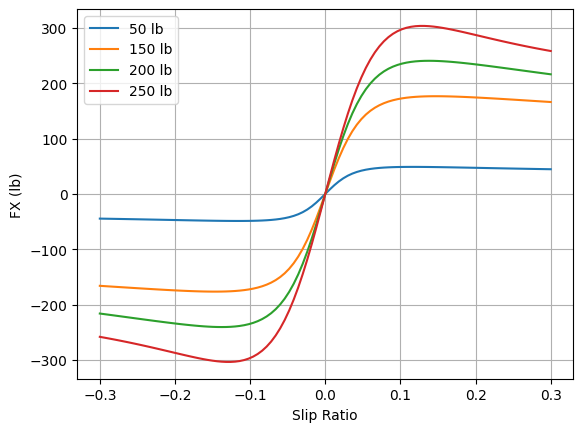

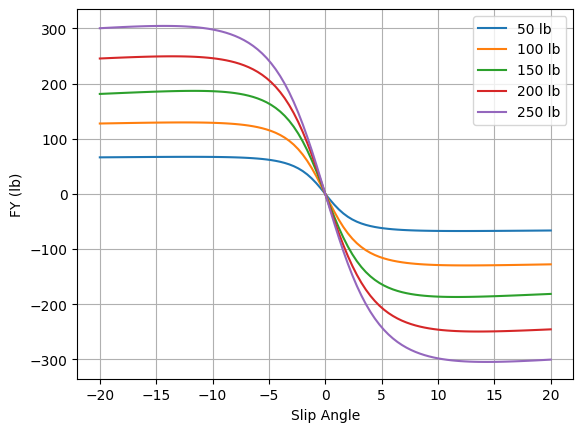

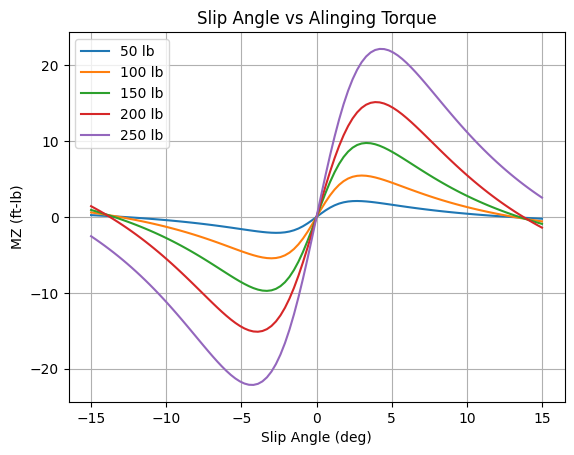

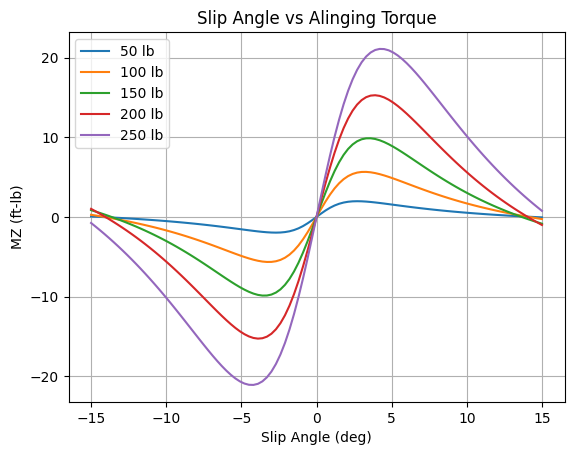

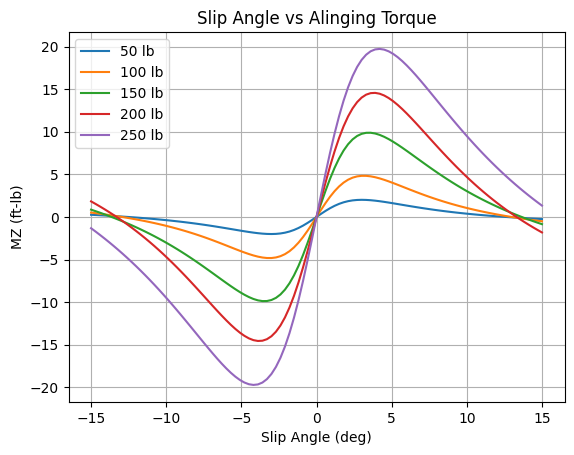

In [1]:
import pickle as pkl
from tire_model import tire
from matplotlib import pyplot as plt

# loading tire object
file_name = '18x6-10_R20.pkl'
with open(file_name, 'rb') as f:
    wheel = pkl.load(f)

# plotting tire characteristics
wheel.SR_FX_plot(0)
wheel.SA_FY_plot(0)
wheel.SA_MZ_plot(0)
wheel.SA_MZ_plot(2)
wheel.SA_MZ_plot(4)

Create Drivetrain file

In [1]:
import pickle as pkl
from drivetrain_model import drivetrain

train = drivetrain()
file_name = 'drivetrain.pkl'

with open(file_name, 'wb') as f:
    pkl.dump(train, f)

Create Car Model

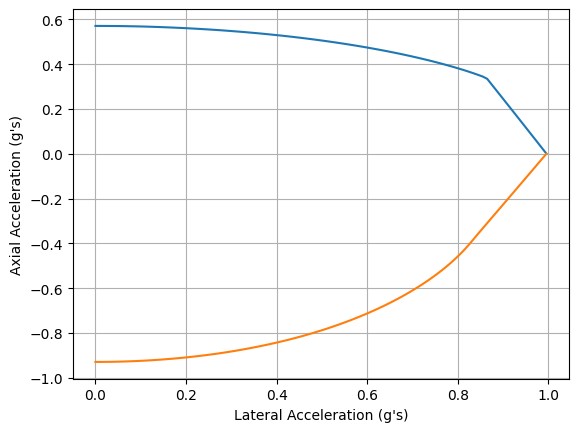

In [2]:
import pickle as pkl
from car_model import car

racecar = car()
file_name = 'car.pkl'
racecar.traction_curve()

with open(file_name, 'wb') as f:
    pkl.dump(racecar, f)

Create Track

333.38003315179736


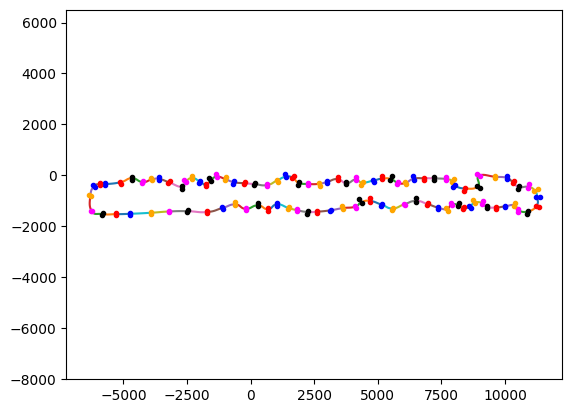

 [####################################################################################################] 100%	cost = 142.53241698805965


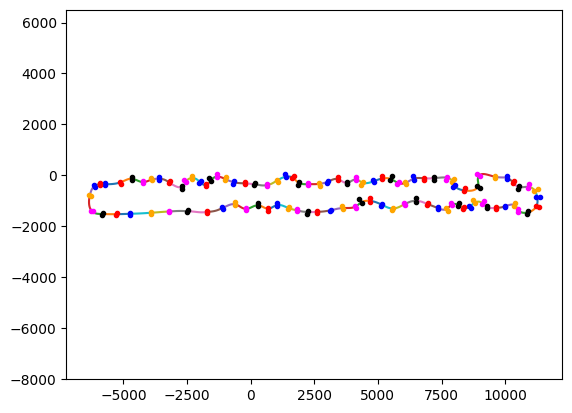

[Track Saved.]


In [6]:
import spline_track as spln
import pickle

points_file = 'C:autocross_pts.pkl'

save_file = 'autocross_trk.pkl'

# loading points
with open(points_file, 'rb') as f:
    points = pickle.load(f)

# defining different points
points_x = points['p1x']
points_y = points['p1y']
points_x2 = points['p2x']
points_y2 = points['p2y']

# creating track object
trk = spln.track(points_x, points_y, points_x2, points_y2)
print(trk.get_cost())

trk.plot() # displaying unoptimized track

# optimizing track
trk.adjust_track([40, 30, 30, 80], [100, 30, 10, 5])

trk.plot() # displaying optimized track

# saving track. Type 'y' to save, 'n' to discard
txt_input = ''
while (txt_input != 'y') and (txt_input != 'n'):
    txt_input = input('save track?: ')
if txt_input == 'y':
    with open(save_file, 'wb') as f:
        pickle.dump(trk, f)
    print('[Track Saved.]')
else:
    print('[Track Discarded.]')

Run Lapsim using pregenerated track

Total Travel Time: 76.1906961088656


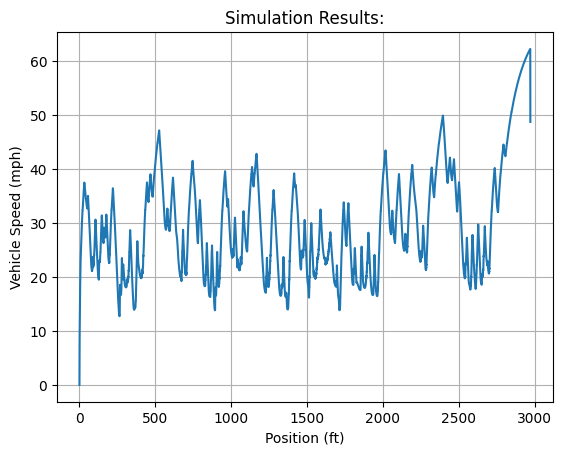

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import spline_track as trk
import pickle as pkl
import lapsim as lpsm
import car_model

with open('autocross_trk.pkl', 'rb') as f:
    autocross = pkl.load(f)

with open('car.pkl', 'rb') as f:
    car = pkl.load(f)
car.file_location = 'car.pkl'

# running simulation. End is set to 89 because the last few curves in the autocross event are not considered part of the track
autocross.plt_sim(car, end=89)